# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET 
- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
- Datasource: https://www.kaggle.com/datasets/smokingkrils/avacado-price-prediction

# Facebook Prophet:
- Prophet is open source software released by Facebook’s Core Data Science team.
- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
- Prophet works best with time series that have strong seasonal effects and several seasons of historical data.

# Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

c:\Users\castr\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
avocado_df = pd.read_csv(r'Data/avocado.csv')

# Explore Dataset

In [5]:
avocado_df.shape

(18249, 14)

In [6]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avocado_df = avocado_df.sort_values('Date')

In [10]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


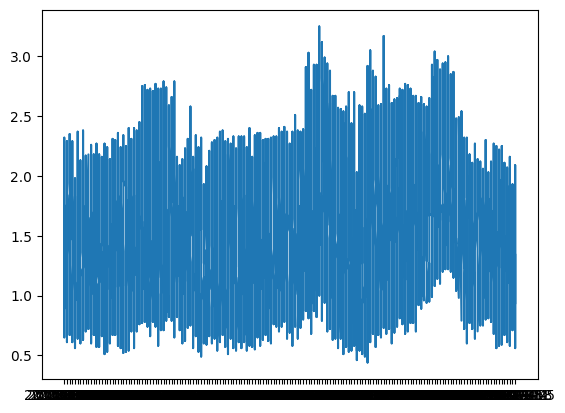

In [15]:
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

# Predictions of the price for a year after the dataset

In [16]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [17]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [18]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date': 'ds', 'AveragePrice':'y'})

In [19]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [21]:
m = Prophet()
m.fit(avocado_prophet_df)

20:49:18 - cmdstanpy - INFO - Chain [1] start processing
20:49:25 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497441,0.900727,1.886623,1.497441,1.497441,-0.113260,-0.113260,-0.113260,-0.113260,-0.113260,-0.113260,0.0,0.0,0.0,1.384181
1,2015-01-11,1.492331,0.921029,1.880980,1.492331,1.492331,-0.104775,-0.104775,-0.104775,-0.104775,-0.104775,-0.104775,0.0,0.0,0.0,1.387556
2,2015-01-18,1.487221,0.909708,1.862499,1.487221,1.487221,-0.104458,-0.104458,-0.104458,-0.104458,-0.104458,-0.104458,0.0,0.0,0.0,1.382763
3,2015-01-25,1.482111,0.850601,1.815857,1.482111,1.482111,-0.123457,-0.123457,-0.123457,-0.123457,-0.123457,-0.123457,0.0,0.0,0.0,1.358654
4,2015-02-01,1.477002,0.847018,1.783253,1.477002,1.477002,-0.151865,-0.151865,-0.151865,-0.151865,-0.151865,-0.151865,0.0,0.0,0.0,1.325137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.163363,0.582656,1.574739,0.995505,1.341224,-0.086192,-0.086192,-0.086192,-0.086192,-0.086192,-0.086192,0.0,0.0,0.0,1.077170
530,2019-03-22,1.162635,0.578551,1.610827,0.994159,1.341336,-0.084516,-0.084516,-0.084516,-0.084516,-0.084516,-0.084516,0.0,0.0,0.0,1.078119
531,2019-03-23,1.161907,0.556286,1.615129,0.992817,1.340902,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.079342
532,2019-03-24,1.161180,0.567332,1.605074,0.991038,1.340414,-0.080361,-0.080361,-0.080361,-0.080361,-0.080361,-0.080361,0.0,0.0,0.0,1.080819


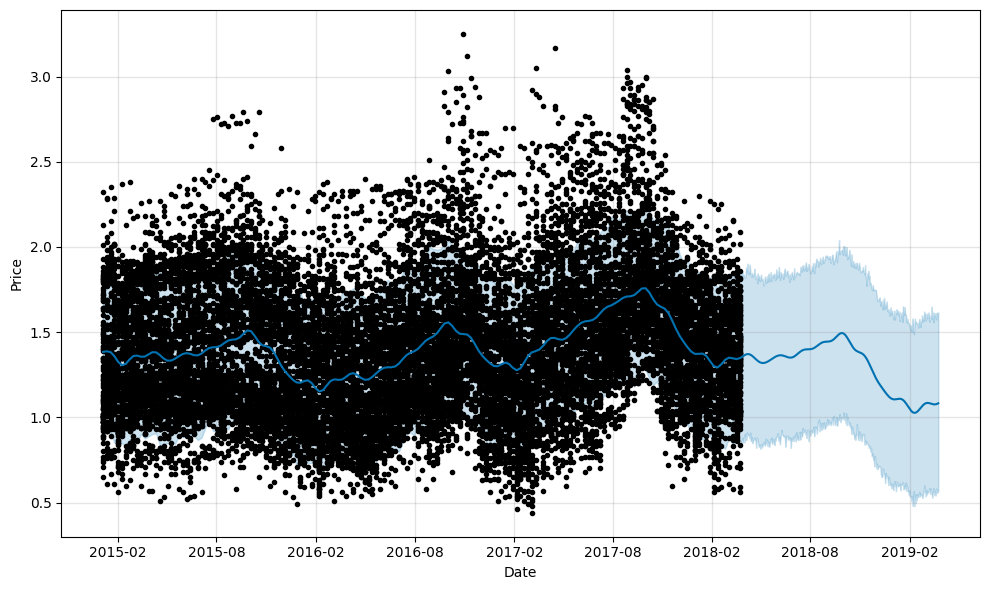

In [25]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

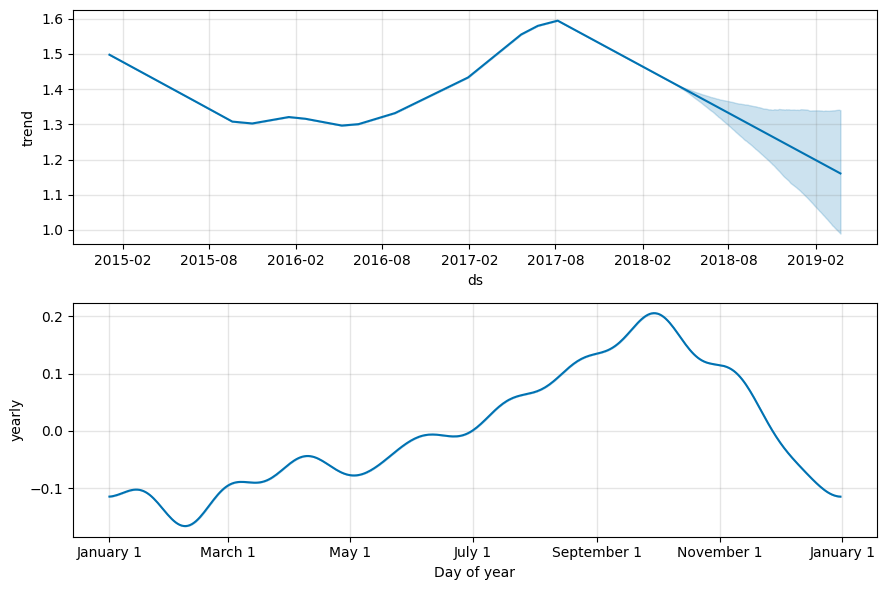

In [26]:
figure = m.plot_components(forecast)

# Predictions of the price for a specific region one year after the dataset

In [28]:
avocado_df_sample = avocado_df[avocado_df['region'] == 'West']

In [30]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


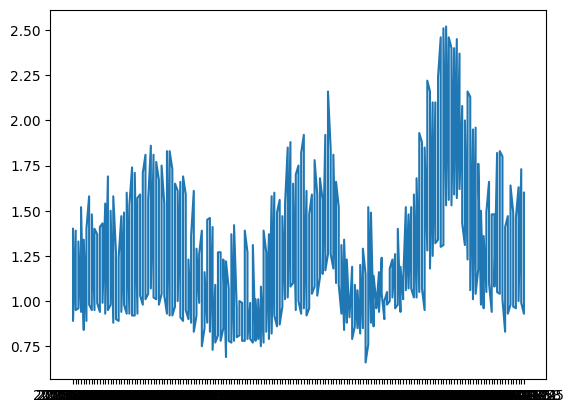

In [31]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [32]:
avocado_df_sample = avocado_df_sample.rename(columns= {'Date': 'ds', 'AveragePrice': 'y' })

In [33]:
avocado_df_sample

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [34]:
m = Prophet()
m.fit(avocado_df_sample)

21:07:16 - cmdstanpy - INFO - Chain [1] start processing
21:07:16 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

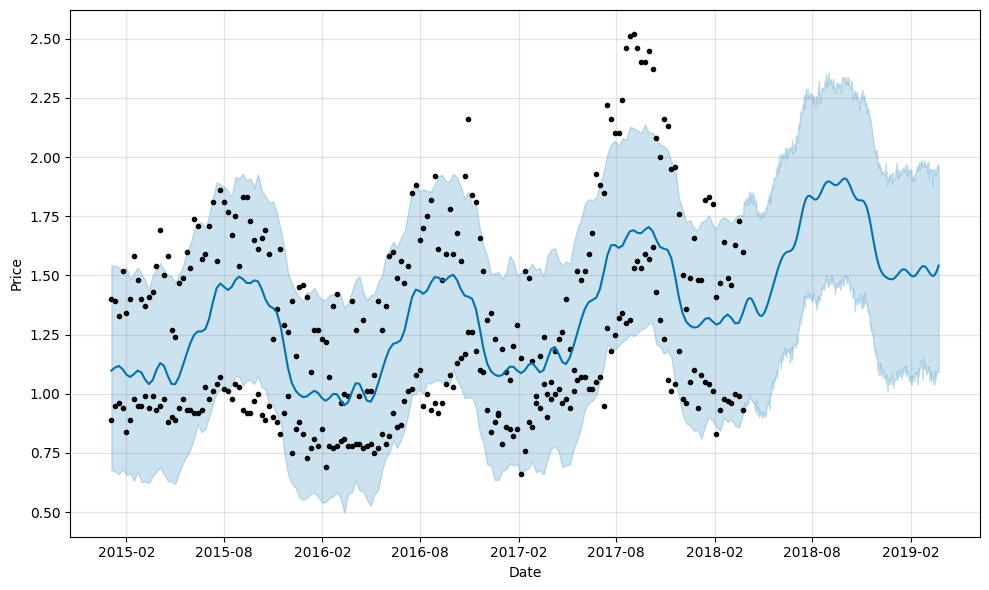

In [36]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

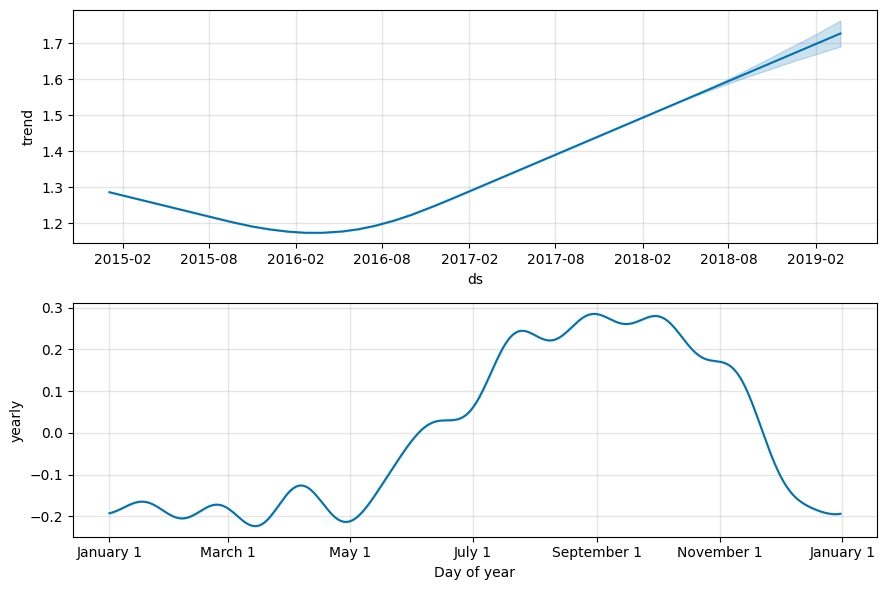

In [37]:
figure = m.plot_components(forecast)